In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as ticker
import statistics

In [10]:
df = pd.read_csv(r"C:\Users\bhuva\Downloads\netflix_customer_churn.csv")
df

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


In [11]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [13]:
df.shape

(5000, 14)

In [14]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [28]:
df.dtypes

customer_id                object
age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object

In [29]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

In [30]:
df['churned'].value_counts()/len(df)*100

churned
1    50.3
0    49.7
Name: count, dtype: float64

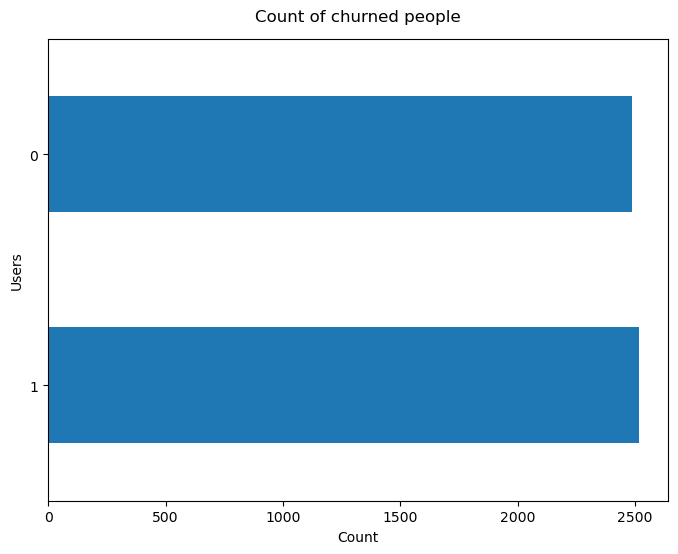

In [32]:
df['churned'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Users")
plt.title("Count of churned people", y=1.02);
plt.show()

# Univariate Analysis

In [45]:
df_new = df[['age','watch_hours','last_login_days','monthly_fee','churned','number_of_profiles','avg_watch_time_per_day']]
df_new

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,51,14.73,29,8.99,1,1,0.49
1,47,0.70,19,13.99,1,5,0.03
2,27,16.32,10,13.99,0,2,1.48
3,53,4.51,12,17.99,1,2,0.35
4,56,1.89,13,13.99,1,2,0.13
...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10
4996,67,9.24,2,8.99,0,3,3.08
4997,66,16.55,49,13.99,1,2,0.33
4998,59,9.12,3,8.99,0,4,2.28


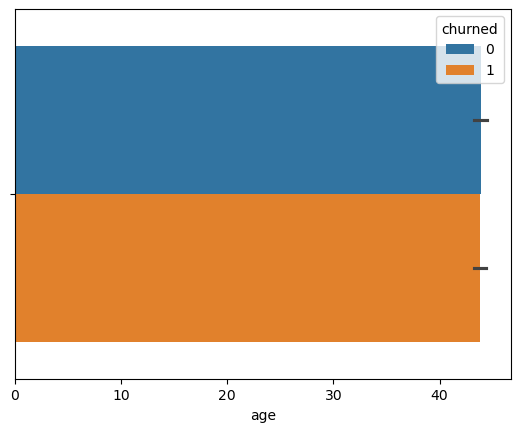

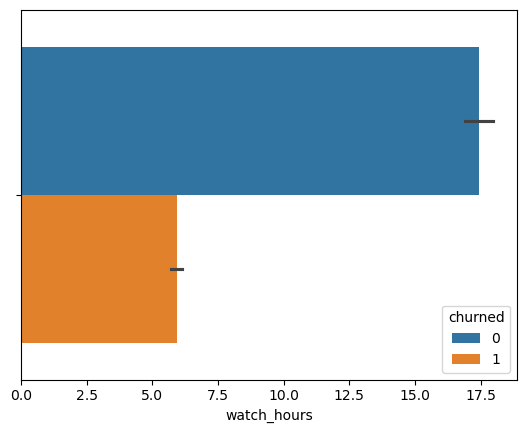

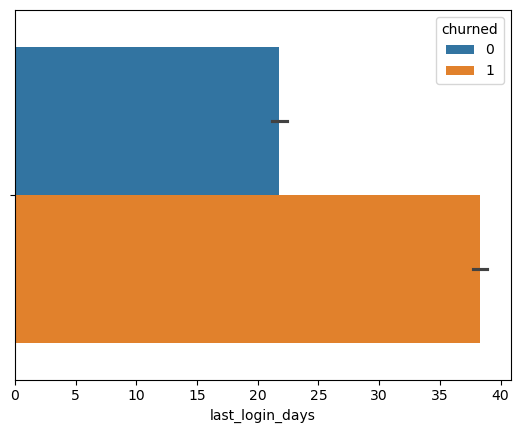

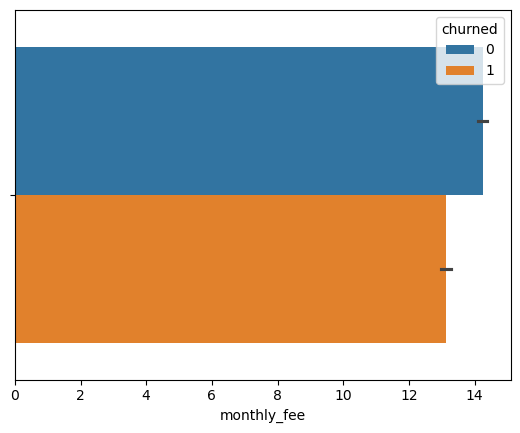

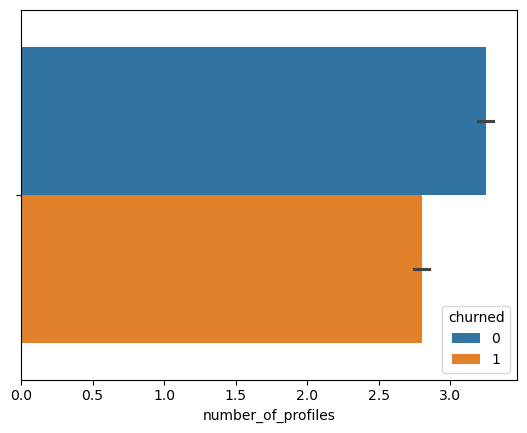

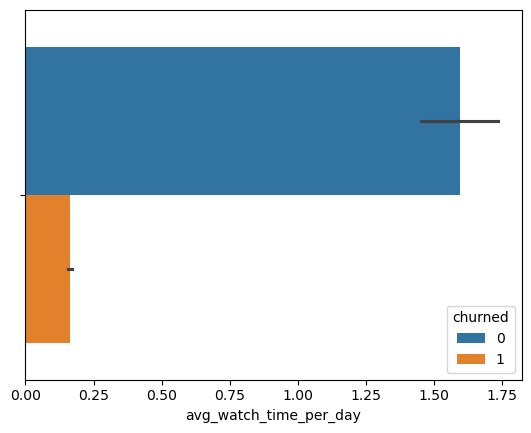

In [47]:
for i,predictor in enumerate (df_new.drop(columns=['churned'])):
    plt.figure()
    sns.barplot(data = df_new, x=predictor,hue = 'churned')
    plt.show()

# Insights

1.People who had less watching hours has churned approximately 6.0


2.People who had longer streak of last login days has churned

3.People who had 2 to 3 profiles have left

4.people who had less watch time per day has left,churned

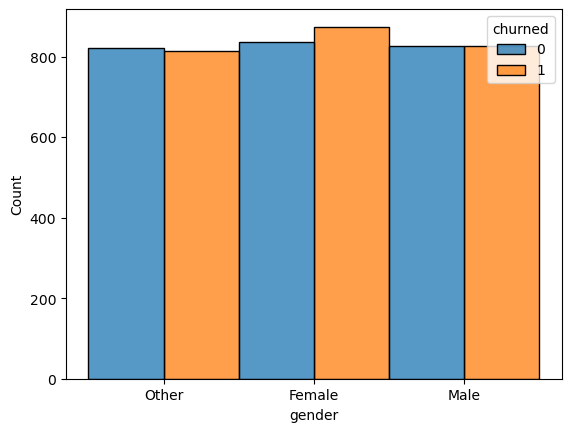

In [67]:
sns.histplot(x='gender',hue='churned',data = df,stat="count",multiple="dodge")
plt.show()

In [51]:
df['gender'].value_counts()

gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [56]:
df['favorite_genre'].value_counts()

favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64

In [75]:
df['gender'].value_counts(['churned'])

gender
Female    0.3422
Male      0.3308
Other     0.3270
Name: proportion, dtype: float64

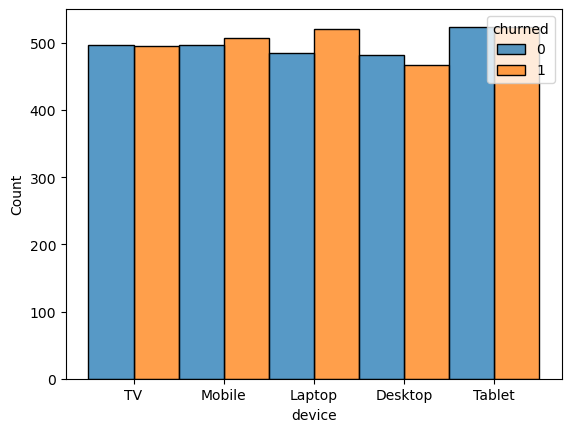

In [76]:
sns.histplot(x='device',hue='churned',data = df,stat="count",multiple="dodge")
plt.show()

In [77]:
df['device'].value_counts()

device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

In [84]:
df.select_dtypes(int).corr()


,age,last_login_days,churned,number_of_profiles
age,1.000000,0.016769,-0.003515,0.017333
last_login_days,0.016769,1.000000,0.471590,0.017242
churned,-0.003515,0.471590,1.000000,-0.158614
number_of_profiles,0.017333,0.017242,-0.158614,1.000000


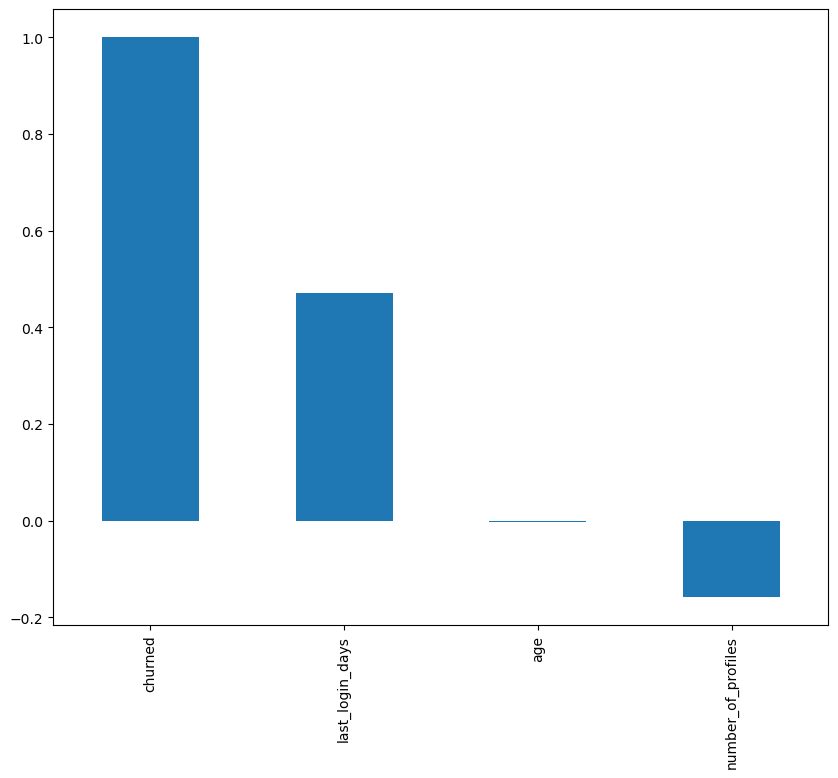

In [91]:
plt.figure(figsize=(10,8))
df.select_dtypes(int).corr()['churned'].sort_values(ascending=False).plot(kind='bar')
plt.show()
         
 

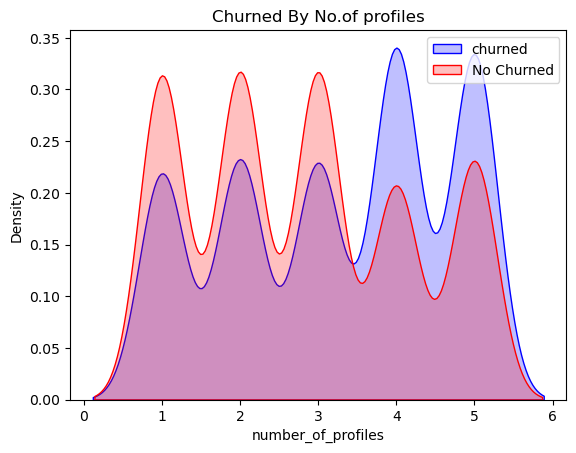

In [101]:
Tot=sns.kdeplot(df.number_of_profiles[(df["churned"]==0)],
color="Blue",fill=True)
Tot=sns.kdeplot(df.number_of_profiles[(df["churned"]==1)],
color="Red",fill=True)
Tot.set_ylabel('Density')
Tot.set_xlabel('number_of_profiles')
Tot.set_title("Churned By No.of profiles")
Tot.legend(["churned","No Churned"],loc='upper right')
plt.show()


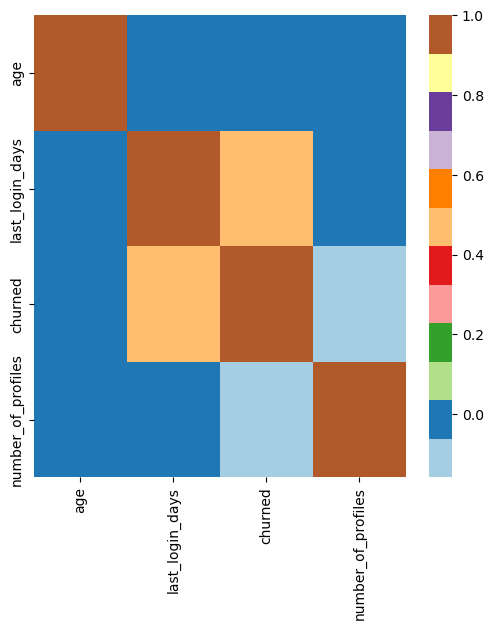

In [109]:
plt.figure(figsize= (6,6))
sns.heatmap(df.select_dtypes(int).corr(), cmap='Paired')
plt.show()